In [1]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# load data
# Load data
train = pd.read_csv('https://raw.githubusercontent.com/PyDataWorkshop/datasets/master/titanic/train.csv')  
test = pd.read_csv('https://raw.githubusercontent.com/PyDataWorkshop/datasets/master/titanic/test.csv')

## Data Exploration

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
print ("Dimension of train data {}".format(train.shape))

Dimension of train data (891, 12)


In [6]:
#train.dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print(train.columns.values)
#train.columns

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


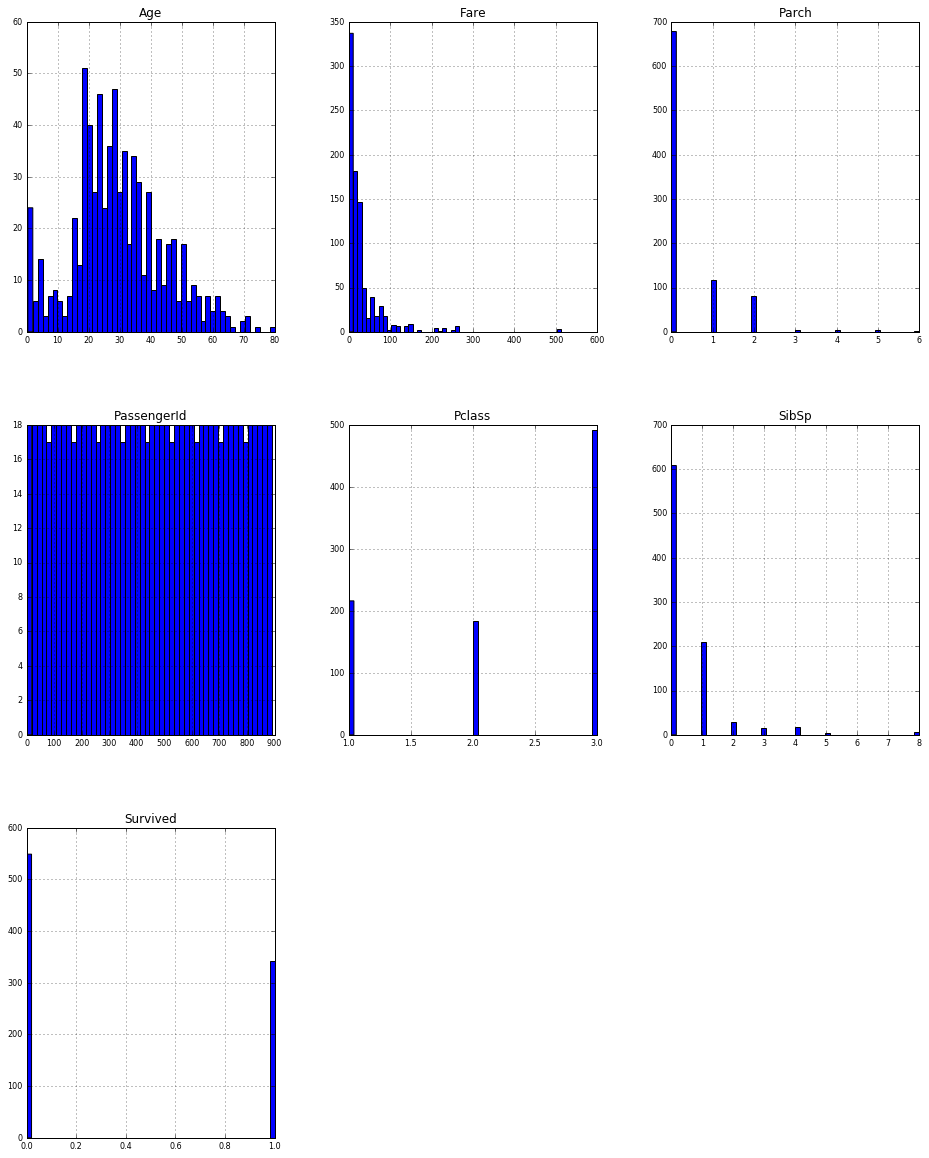

In [9]:
train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [10]:
#distribution of passengers by gender
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

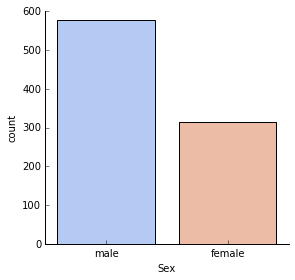

In [11]:
sns.factorplot(x='Sex',data=train,kind='count',palette='coolwarm')

In [12]:
#the highest ticket
train.Fare.max()

512.32920000000001

In [13]:
#the oldest passenger
train.Age.max()

80.0

In [14]:
print (train.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64


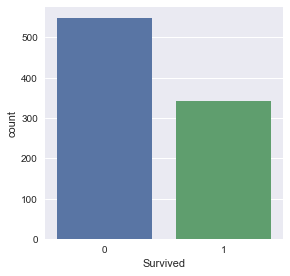

In [15]:
sns.factorplot(x='Survived',data=train,kind='count')

In [16]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


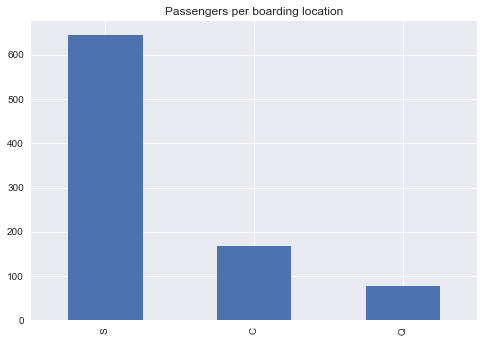

In [18]:
train.Embarked.value_counts().plot(kind='bar')
plt.title("Passengers per boarding location");

In [19]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

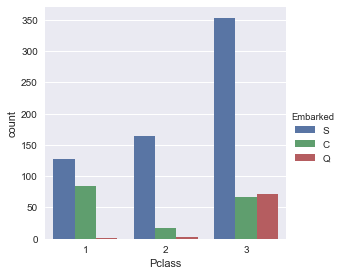

In [20]:
sns.factorplot(x='Pclass',kind='count',data=train,hue='Embarked')

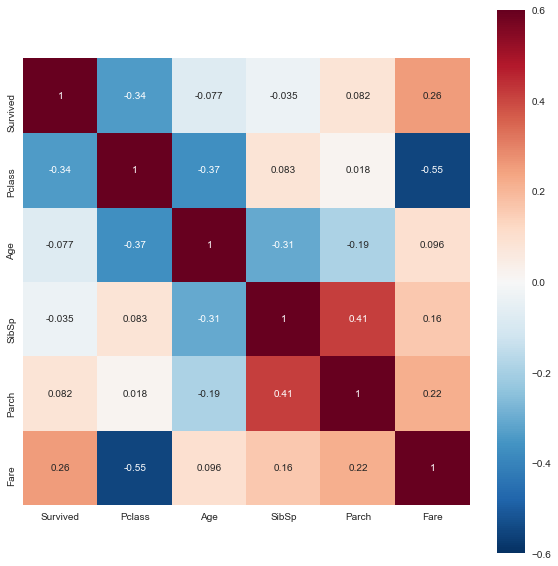

In [98]:
#correlation matrix
#corrmat = train.corr()
#f, ax = plt.subplots(figsize=(12, 9))
#sns.heatmap(corrmat, vmax=.8, square=True);

plt.figure(figsize=(10,10))
foo = sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

# Data Cleaning

## Missing values imputation

* drop (remove) values or rows
* change with median, mean or mode
* imputing with more appropriate value
* advance imputation using predictive modelling

In [21]:
#show missing values in each column
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
#Lets check which rows have null Embarked column
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [23]:
# both passengers have class 1 and fare $80.

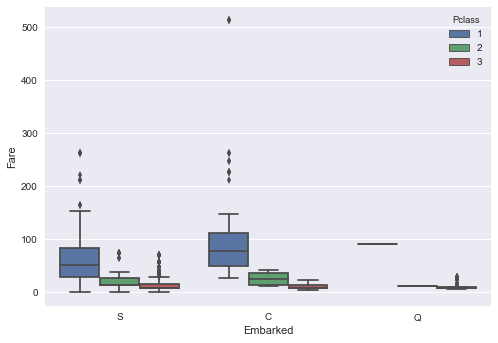

In [24]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train);

In [25]:
#We can see that for 1st class median line is coming around fare $80 for embarked value 'C'
#replace NA for Embarked with value  C
train.Embarked.fillna('C',inplace=True)

In [26]:
#train.Age.fillna(train.Age.median(),inplace=True)
#train['Age'].fillna(np.mean(train.Age), inplace = True)

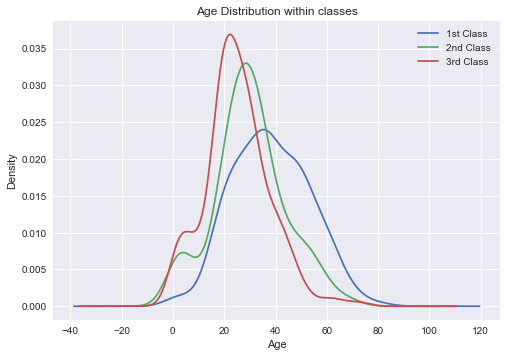

In [27]:
train.Age[train.Pclass == 1].plot(kind='kde')    
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best');

In [28]:
grouped = train.groupby(['Sex','Pclass'])
grouped.median()

PassengerId  Survived   Age  SibSp  Parch      Fare
Sex    Pclass                                                     
female 1             447.0       1.0  35.0    0.0    0.0  82.66455
       2             439.5       1.0  28.0    0.0    0.0  22.00000
       3             376.0       0.5  21.5    0.0    0.0  12.47500
male   1             480.5       0.0  40.0    0.0    0.0  41.26250
       2             416.5       0.0  30.0    0.0    0.0  13.00000
       3             466.0       0.0  25.0    0.0    0.0   7.92500

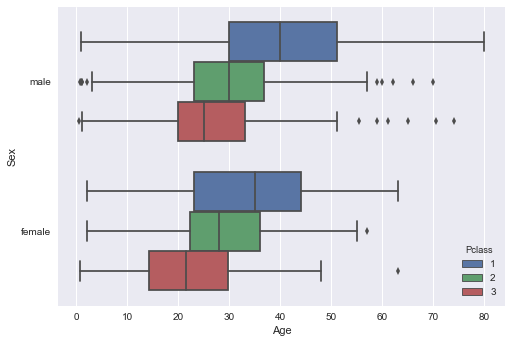

In [29]:
sns.boxplot(x="Age", y="Sex", hue="Pclass", data=train);

In [30]:
# age_imputer function that fills the missing values of the Age feature 
    
def age_imputer(row):
        if row['Sex']=='female' and row['Pclass'] == 1:
                return 35

        elif row['Sex']=='female' and row['Pclass'] == 2:
                return 28

        elif row['Sex']=='female' and row['Pclass'] == 3:
                return 21.5

        elif row['Sex']=='male' and row['Pclass'] == 1:
                return 40

        elif row['Sex']=='male' and row['Pclass'] == 2:
                return 30

        elif row['Sex']=='male' and row['Pclass'] == 3:
                return 25

train.Age = train.apply(lambda r : age_imputer(r) if np.isnan(r['Age']) else r['Age'], axis=1)

In [31]:
train['Age'].describe()

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [80]:
# imputing Age with more advance methods    

# Feature Engineering

In [32]:
# Create a family size feature including the passenger themselves
train["FamilySize"] = train["SibSp"] + train["Parch"]+1
print(train["FamilySize"].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


In [33]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [34]:
#create title feature
#train['Title'] = train['Name'].apply(lambda x: x.split(",")[1].split(" ")[1])

# extract the title from each name
train['Title'] = train['Name'].map(lambda x:x.split(",")[1].split(".")[0].strip())
    
# a map of more aggregated titles
Title_Dictionary = {
                        "Capt":       "Manager",
                        "Col":        "Manager",
                        "Major":      "Manager",
                        "Jonkheer":   "Noble",
                        "Don":        "Noble",
                        "Sir" :       "Noble",
                        "Dr":         "Manager",
                        "Rev":        "Manager",
                        "the Countess":"Noble",
                        "Dona":       "Noble",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Noble"

                        }
    
# map each title
train['Title'] = train.Title.map(Title_Dictionary)



train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [35]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,Mrs


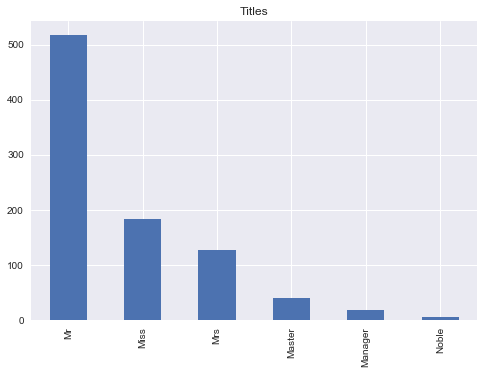

In [40]:
#train['Title'].describe
train.Title.value_counts().plot(kind='bar')
plt.title("Titles");

In [41]:
#drop columns
train.drop('Name', inplace = True, axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [42]:
train.drop('Cabin', inplace = True, axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,2,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,2,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,2,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,1,Mr


In [43]:
train.drop('Ticket', inplace = True, axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,1,0,7.2500,S,2,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,2,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,1,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,2,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,1,Mr


In [44]:
#convert Male to 1
train['Sex'] = train['Sex'].map({"male":1, "female":0})
#train['Male'] = train['Sex'].apply(lambda x: 1 if x == "male" else 0)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,1,0,3,1,22.0,1,0,7.2500,S,2,Mr
1,2,1,1,0,38.0,1,0,71.2833,C,2,Mrs
2,3,1,3,0,26.0,0,0,7.9250,S,1,Miss
3,4,1,1,0,35.0,1,0,53.1000,S,2,Mrs
4,5,0,3,1,35.0,0,0,8.0500,S,1,Mr


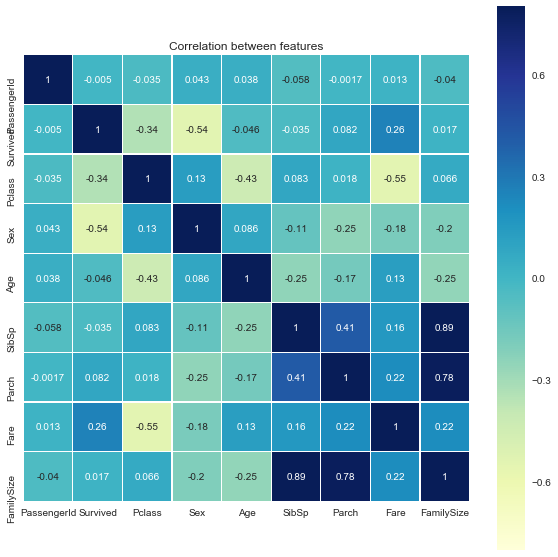

In [118]:
corr=train.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

# Convert Categorical features into Numerical ones

In [45]:
#Dummy variables
train_numerical = pd.get_dummies(train, columns = ['Embarked', 'Title'])
train_numerical.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title_Manager,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble
0,1,0,3,1,22.0,1,0,7.2500,2,0,0,1,0,0,0,1,0,0
1,2,1,1,0,38.0,1,0,71.2833,2,1,0,0,0,0,0,0,1,0
2,3,1,3,0,26.0,0,0,7.9250,1,0,0,1,0,0,1,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,2,0,0,1,0,0,0,0,1,0
4,5,0,3,1,35.0,0,0,8.0500,1,0,0,1,0,0,0,1,0,0
